In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [4]:
PATH = Path('/home/jupyter/reports')
assert PATH.exists()

In [98]:
!ls -latr {PATH}

total 108
drwxr-xr-x  2 root root 4096 Feb 25 18:01 .ipynb_checkpoints
-rw-r--r--  1 root root  883 Feb 25 20:24 28_pytorch_manet_efficientnet_b6_1024_2shifted_slices_groupkfold_extra_albu
-rw-r--r--  1 root root  177 Feb 26 16:35 28_pytorch_fpn_efficientnet_b6_1024_2shifted_slices_groupkfold_extra_albu
-rw-r--r--  1 root root 1766 Feb 26 20:12 28_pytorch_fpn_efficientnet_b6_1024_2shifted_slices_groupkfold_extra_albu_fold_1
-rw-r--r--  1 root root 1767 Feb 26 23:31 28_pytorch_fpn_efficientnet_b6_1024_2shifted_slices_groupkfold_extra_albu_fold_2
-rw-r--r--  1 root root 1762 Feb 27 02:50 28_pytorch_fpn_efficientnet_b6_1024_2shifted_slices_groupkfold_extra_albu_fold_3
-rw-r--r--  1 root root  176 Feb 27 09:23 30_pytorch_pan_efficientnet_b6_1024_2shifted_slices_groupkfold_extra_albu_fold_0
-rw-r--r--  1 root root 1765 Feb 27 14:42 30_pytorch_fpn_efficientnet_b6_1024_2shifted_slices_groupkfold_fastai_fold_0
-rw-r--r--  1 root root 2111 Feb 27 19:04 32_pytorch_fpn_efficientnet_b6_1024_2shift

In [63]:
fpn_metrics = pd.read_json(PATH/'28_pytorch_fpn_efficientnet_b6_1024_2shifted_slices_groupkfold_extra_albu_fold_1')
fpn_metrics

,fold,epoch,best_loss,dice_metric_mean,dice_coeff_mean,iou_metric_mean
0,1,0,0.117850,0.781289,0.884858,0.794790
1,1,1,0.101208,0.822744,0.900508,0.820651
2,1,2,0.084828,0.830062,0.915838,0.846226
3,1,3,0.081175,0.831132,0.919243,0.851672
4,1,4,0.079255,0.840243,0.920977,0.854485
5,1,5,0.077197,0.851938,0.923158,0.858522
6,1,6,0.072947,0.858165,0.927407,0.865484
7,1,7,0.072947,0.853115,0.926227,0.863500
8,1,8,0.072947,0.857920,0.925430,0.862498
9,1,9,0.072947,0.854215,0.925121,0.861634


<AxesSubplot:>

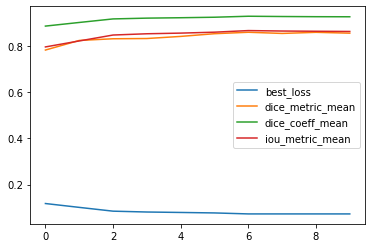

In [64]:
fpn_metrics[fpn_metrics.fold == 1][['best_loss', 'dice_metric_mean', 'dice_coeff_mean', 'iou_metric_mean']].plot()

In [8]:
def plot_results(fpn_metrics):
    plt.figure(figsize=(15,5))
    n_e = np.arange(len(fpn_metrics['dice_metric_mean']))
    plt.plot(n_e, fpn_metrics['dice_metric_mean'], '-o', label='Valid dice metric', color='#ff7f0e')
    plt.plot(n_e, fpn_metrics['dice_coeff_mean'],'-o', label='Val dice_coeff', color='#1f77b4')
    plt.plot(n_e, fpn_metrics['iou_metric_mean'],'-o', label='Val dice_coeff', color='#2ca02c')

    def show_max(label = 'dice_metric_mean', col='#ff7f0e'):
        x = np.argmax( fpn_metrics[label] ); y = np.max( fpn_metrics[label] )
        xdist = plt.xlim()[1] - plt.xlim()[0]; ydist = plt.ylim()[1] - plt.ylim()[0]
        plt.scatter(x,y,s=200,color=col); plt.text(x-0.03*xdist,y-0.13*ydist, f'max {label}\n%.2f'%y,size=14)

    show_max('dice_metric_mean', '#ff7f0e')
    show_max('dice_coeff_mean', '#1f77b4')
    show_max('iou_metric_mean', '#2ca02c')

    plt2 = plt.gca().twinx()
    plt2.plot(n_e, fpn_metrics['best_loss'],'-o',label='Val Loss',color='#d62728')

    plt.ylabel('dice_coe',size=14); plt.xlabel('Epoch',size=14)
    plt.legend(loc=2)
    plt2 = plt.gca().twinx()
    plt.legend(loc=3)

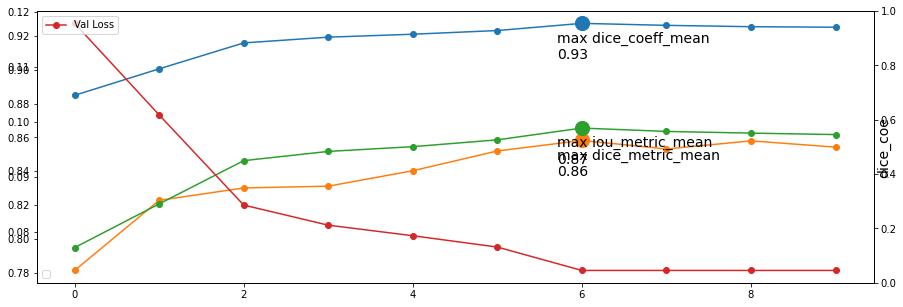

In [66]:
plot_results(fpn_metrics)

In [72]:
fpn_metrics = pd.read_json(PATH/'28_pytorch_fpn_efficientnet_b6_1024_2shifted_slices_groupkfold_extra_albu_fold_2')
fpn_metrics

,fold,epoch,best_loss,dice_metric_mean,dice_coeff_mean,iou_metric_mean
0,2,0,0.147058,0.725353,0.857889,0.754394
1,2,1,0.108743,0.773069,0.891412,0.806961
2,2,2,0.105712,0.801263,0.894610,0.812180
3,2,3,0.105712,0.787847,0.891172,0.806902
4,2,4,0.102693,0.805502,0.897526,0.816697
5,2,5,0.098989,0.816635,0.901283,0.822621
6,2,6,0.094721,0.822741,0.905384,0.829660
7,2,7,0.094693,0.816263,0.905413,0.829207
8,2,8,0.093737,0.815077,0.906444,0.831116
9,2,9,0.092910,0.817011,0.907238,0.832461


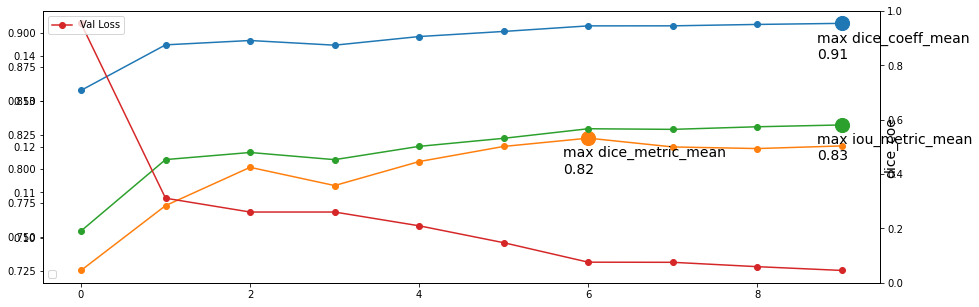

In [73]:
plot_results(fpn_metrics)

In [74]:
fpn_metrics = pd.read_json(PATH/'28_pytorch_fpn_efficientnet_b6_1024_2shifted_slices_groupkfold_extra_albu_fold_3')
fpn_metrics

,fold,epoch,best_loss,dice_metric_mean,dice_coeff_mean,iou_metric_mean
0,3,0,0.169136,0.718294,0.833187,0.718084
1,3,1,0.169136,0.696642,0.829276,0.712817
2,3,2,0.135500,0.743978,0.864313,0.763737
3,3,3,0.128457,0.770475,0.871588,0.775444
4,3,4,0.128457,0.770266,0.867755,0.769575
5,3,5,0.128457,0.761946,0.863425,0.762720
6,3,6,0.128177,0.767833,0.871904,0.776109
7,3,7,0.126861,0.771529,0.872978,0.777203
8,3,8,0.123726,0.778089,0.876254,0.782127
9,3,9,0.123726,0.786990,0.874977,0.780588


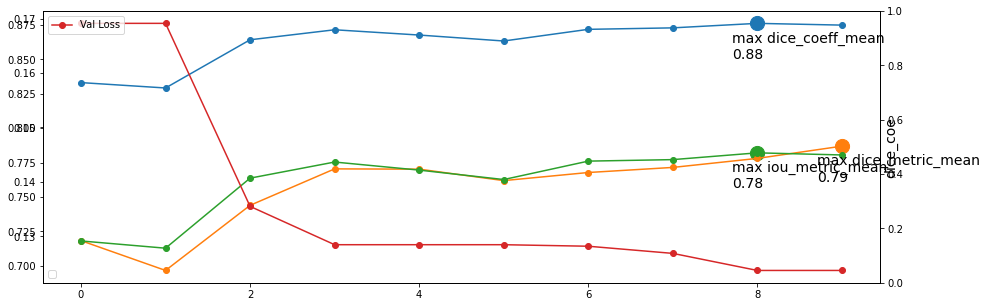

In [75]:
plot_results(fpn_metrics)

In [22]:
fpn_metrics = pd.read_json(PATH/'32_pytorch_fpn_efficientnet_b6_1024_2shifted_slices_groupkfold_fastai_fold_0')
fpn_metrics

,fold,epoch,best_loss,dice_metric_mean,dice_coeff_mean,iou_metric_mean
0,0,0,0.168919,0.719270,0.833614,0.721829
1,0,1,0.147050,0.750368,0.853126,0.750974
2,0,2,0.143466,0.760160,0.856861,0.756276
3,0,3,0.140630,0.761128,0.859370,0.760140
4,0,4,0.130762,0.771928,0.869337,0.771562
5,0,5,0.130762,0.764013,0.861939,0.764366
6,0,6,0.130762,0.779711,0.866535,0.768293
7,0,7,0.130762,0.770857,0.859665,0.762436
8,0,8,0.130762,0.782569,0.864489,0.768221
9,0,9,0.128326,0.784771,0.871631,0.775932


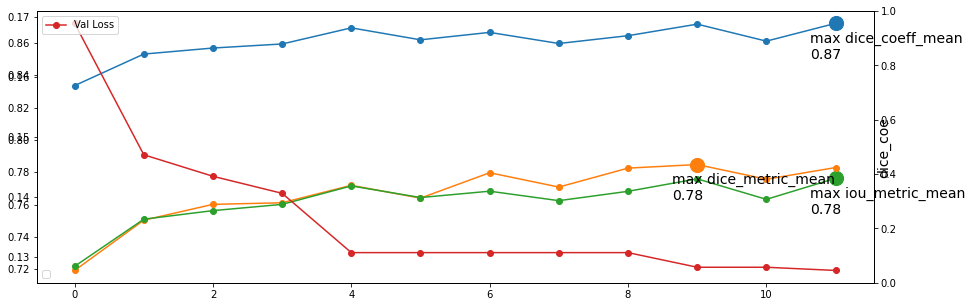

In [23]:
plot_results(fpn_metrics)

In [34]:
fpn_metrics = pd.read_json(PATH/'32_pytorch_fpn_efficientnet_b6_1024_2shifted_slices_groupkfold_fastai_fold_1')
fpn_metrics

,fold,epoch,best_loss,dice_metric_mean,dice_coeff_mean,iou_metric_mean
0,1,0,0.121569,0.781727,0.880404,0.787619
1,1,1,0.087986,0.824608,0.912579,0.840227
2,1,2,0.087986,0.827172,0.910768,0.837731
3,1,3,0.087986,0.824242,0.911498,0.838667
4,1,4,0.083481,0.828370,0.917145,0.848105
5,1,5,0.082196,0.831912,0.918431,0.850443
6,1,6,0.074672,0.853567,0.925630,0.862567
7,1,7,0.074672,0.860029,0.923719,0.859450
8,1,8,0.074672,0.842150,0.923563,0.859067
9,1,9,0.074672,0.862601,0.925053,0.861779


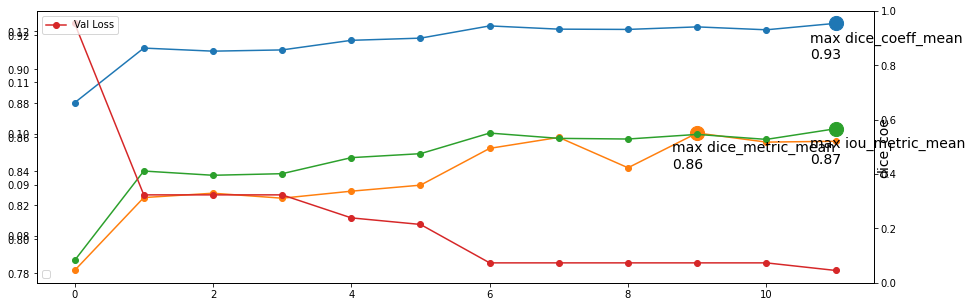

In [35]:
plot_results(fpn_metrics)

In [37]:
fpn_metrics = pd.read_json(PATH/'32_pytorch_fpn_efficientnet_b6_1024_2shifted_slices_groupkfold_fastai_fold_2')
fpn_metrics

,fold,epoch,best_loss,dice_metric_mean,dice_coeff_mean,iou_metric_mean
0,2,0,0.143776,0.725918,0.858041,0.754658
1,2,1,0.119002,0.776439,0.880735,0.789568
2,2,2,0.111655,0.775261,0.888672,0.802322
3,2,3,0.106297,0.790037,0.893650,0.810596
4,2,4,0.099906,0.804799,0.900319,0.821029
5,2,5,0.099906,0.790931,0.897949,0.817541
6,2,6,0.098356,0.807006,0.901721,0.823598
7,2,7,0.098356,0.804897,0.900045,0.820570
8,2,8,0.096483,0.817494,0.903516,0.826105
9,2,9,0.096483,0.801326,0.902721,0.825213


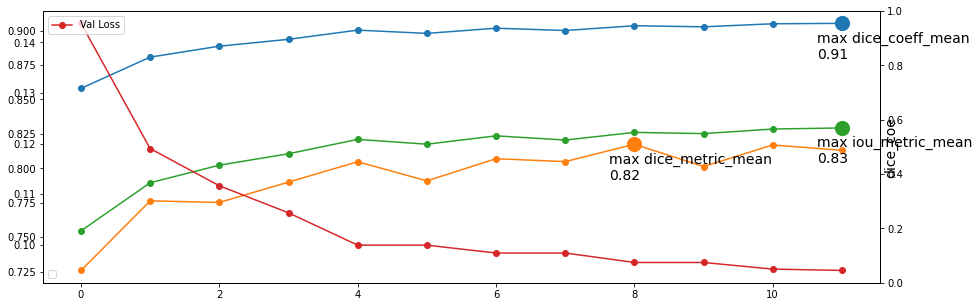

In [39]:
plot_results(fpn_metrics)

In [40]:
fpn_metrics = pd.read_json(PATH/'32_pytorch_fpn_efficientnet_b6_1024_2shifted_slices_groupkfold_fastai_fold_3')
fpn_metrics

,fold,epoch,best_loss,dice_metric_mean,dice_coeff_mean,iou_metric_mean
0,3,0,0.182357,0.697287,0.817979,0.695651
1,3,1,0.145079,0.738594,0.855179,0.750070
2,3,2,0.145079,0.727214,0.837097,0.723471
3,3,3,0.137694,0.761050,0.862678,0.761550
4,3,4,0.135145,0.764217,0.865212,0.766010
5,3,5,0.135145,0.739173,0.855099,0.750678
6,3,6,0.135145,0.740554,0.849257,0.742016
7,3,7,0.135145,0.757381,0.860941,0.759072
8,3,8,0.131742,0.773825,0.868208,0.770657
9,3,9,0.131742,0.757351,0.862989,0.762354


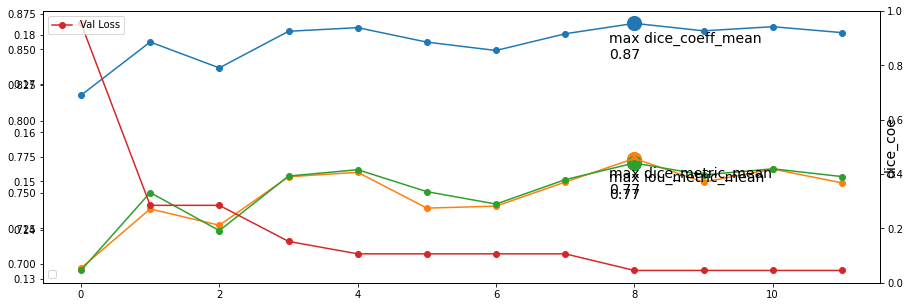

In [41]:
plot_results(fpn_metrics)

In [25]:
fpn_metrics = pd.read_json(PATH/'34_pytorch_unet_efficientnet_b6_1024_768_shifted_slices_groupkfold_fold_0')
fpn_metrics

,fold,epoch,best_loss,dice_metric_mean,dice_coeff_mean,iou_metric_mean
0,0,0,0.486478,0.722083,0.827128,0.708993
1,0,1,0.237589,0.757472,0.864779,0.765194
2,0,2,0.230436,0.771121,0.867479,0.769753
3,0,3,0.230436,0.784201,0.864361,0.764730
4,0,4,0.230436,0.778043,0.866974,0.768934
5,0,5,0.225811,0.785608,0.870554,0.774181
6,0,6,0.223641,0.780980,0.872064,0.776300
7,0,7,0.222317,0.783960,0.872928,0.777628
8,0,8,0.222317,0.786354,0.871115,0.775201
9,0,9,0.222317,0.787425,0.870253,0.773790


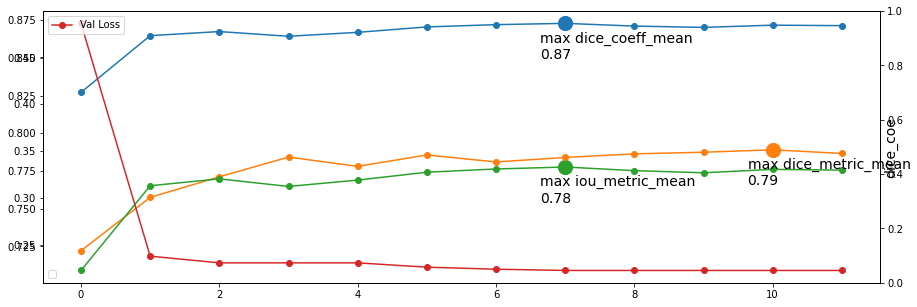

In [26]:
plot_results(fpn_metrics)

In [61]:
fpn_metrics = pd.read_json(PATH/'34_pytorch_unet_efficientnet_b6_1024_768_shifted_slices_groupkfold_fold_0')
fpn_metrics

,fold,epoch,best_loss,dice_metric_mean,dice_coeff_mean,iou_metric_mean
0,0,0,0.284772,0.747139,0.847885,0.744323
1,0,1,0.239833,0.768918,0.858837,0.760449
2,0,2,0.237779,0.759276,0.859732,0.762265
3,0,3,0.233206,0.773328,0.863285,0.766730
4,0,4,0.233206,0.761627,0.856971,0.758321
5,0,5,0.231698,0.773327,0.863465,0.768293
6,0,6,0.222866,0.788795,0.869899,0.777094
7,0,7,0.222866,0.789253,0.865699,0.770629
8,0,8,0.222866,0.785621,0.866957,0.772652
9,0,9,0.222866,0.786633,0.865776,0.771381


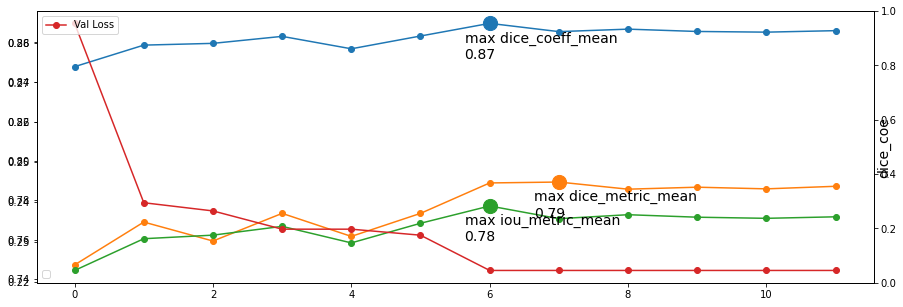

In [62]:
plot_results(fpn_metrics)

In [79]:
fpn_metrics = pd.read_json(PATH/'34_pytorch_unet_efficientnet_b6_1536_768_shifted_slices_groupkfold_fold_0')
fpn_metrics

,fold,epoch,best_loss,dice_metric_mean,dice_coeff_mean,iou_metric_mean
0,0,0,0.400516,0.762793,0.822367,0.704498
1,0,1,0.248723,0.801535,0.855325,0.753965
2,0,2,0.246976,0.800643,0.854741,0.753244
3,0,3,0.246243,0.796880,0.855024,0.753701
4,0,4,0.242071,0.792976,0.857448,0.757922
5,0,5,0.242071,0.806176,0.855593,0.753393
6,0,6,0.235700,0.809802,0.862715,0.764329
7,0,7,0.233400,0.807865,0.864022,0.766555
8,0,8,0.233400,0.814818,0.863477,0.766538
9,0,9,0.231095,0.812590,0.865681,0.768859


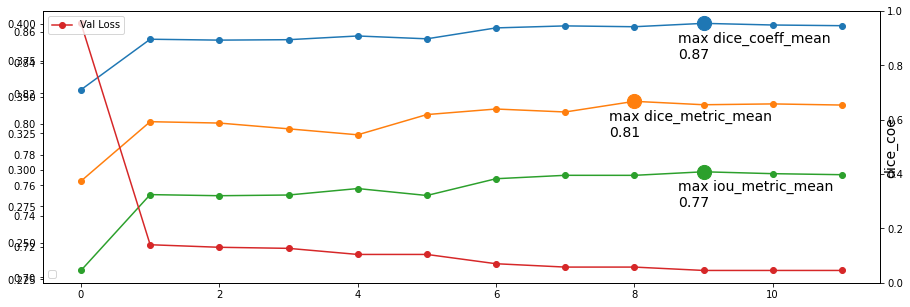

In [80]:
plot_results(fpn_metrics)

In [106]:
metrics = pd.read_json(PATH/'34_pytorch_unet_efficientnet_b6_1536_768_shifted_slices_groupkfold_fold_1')
metrics

,fold,epoch,best_loss,dice_metric_mean,dice_coeff_mean,iou_metric_mean
0,1,0,0.379282,0.803307,0.863292,0.762270
1,1,1,0.165439,0.859927,0.910142,0.838424
2,1,2,0.150487,0.867468,0.917157,0.850269
3,1,3,0.150487,0.854770,0.903134,0.826749
4,1,4,0.150487,0.853530,0.893712,0.813625
5,1,5,0.150487,0.867586,0.914596,0.847370
6,1,6,0.144599,0.869185,0.919894,0.855301
7,1,7,0.143437,0.878319,0.920166,0.856667
8,1,8,0.138292,0.873948,0.923313,0.861917
9,1,9,0.138292,0.875601,0.922613,0.860734


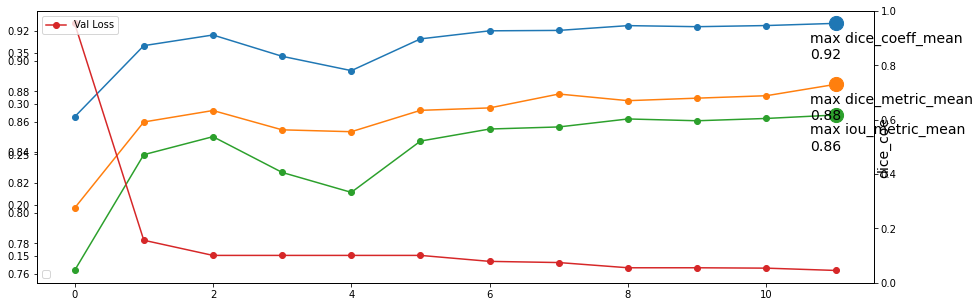

In [107]:
plot_results(metrics)

In [139]:
metrics = pd.read_json(PATH/'34_pytorch_unet_efficientnet_b6_1536_768_shifted_slices_groupkfold_fold_2')
metrics

,fold,epoch,best_loss,dice_metric_mean,dice_coeff_mean,iou_metric_mean
0,2,0,0.391490,0.779035,0.857760,0.756689
1,2,1,0.201493,0.816872,0.887128,0.802605
2,2,2,0.191500,0.824617,0.890050,0.809671
3,2,3,0.191500,0.796749,0.871553,0.784648
4,2,4,0.174691,0.839832,0.901283,0.825784
5,2,5,0.162381,0.848669,0.908561,0.837814
6,2,6,0.162381,0.833795,0.901575,0.828168
7,2,7,0.162381,0.852859,0.898674,0.827603
8,2,8,0.159668,0.853195,0.910201,0.840622
9,2,9,0.157678,0.853320,0.911321,0.842537


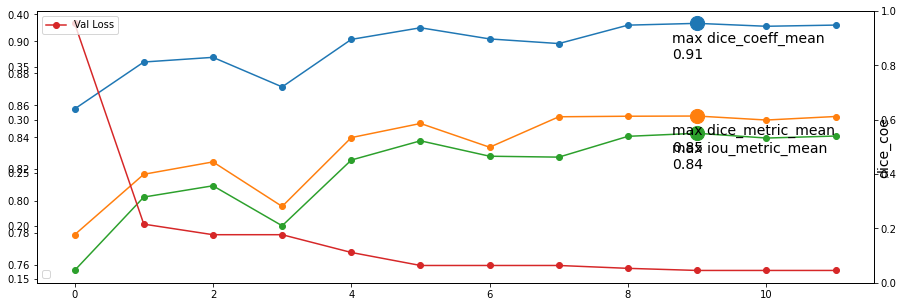

In [140]:
plot_results(metrics)

In [142]:
metrics = pd.read_json(PATH/'34_pytorch_unet_efficientnet_b6_1536_768_shifted_slices_groupkfold_fold_3')
metrics

,fold,epoch,best_loss,dice_metric_mean,dice_coeff_mean,iou_metric_mean
0,3,0,0.410593,0.778401,0.833517,0.718623
1,3,1,0.246552,0.792659,0.858531,0.756844
2,3,2,0.237284,0.822793,0.863588,0.763853
3,3,3,0.228926,0.812843,0.868079,0.771032
4,3,4,0.228926,0.758394,0.818236,0.704361
5,3,5,0.228926,0.807151,0.862808,0.765107
6,3,6,0.218016,0.826671,0.875435,0.781865
7,3,7,0.210089,0.835124,0.880374,0.789829
8,3,8,0.210089,0.825878,0.877346,0.785253
9,3,9,0.210089,0.834240,0.877851,0.786087


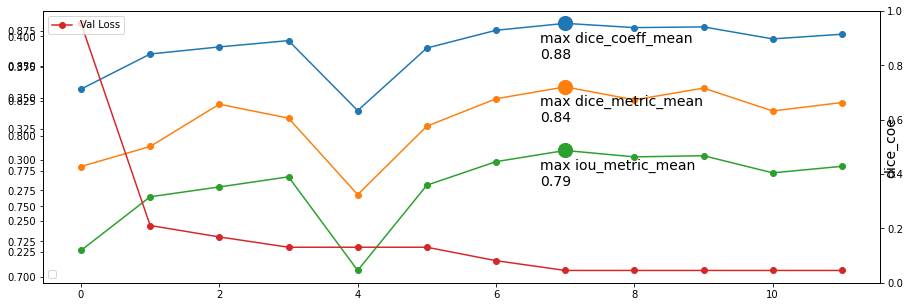

In [143]:
plot_results(metrics)

In [9]:
metrics = pd.read_json(PATH/'35_pytorch_unet_efficientnet_b6_1536_768_shifted_slices_groupkfold_aux_params_fold_0')
metrics

,fold,epoch,best_loss,dice_metric_mean,dice_coeff_mean,iou_metric_mean
0,0,0,0.264972,0.763363,0.823428,0.705287
1,0,1,0.154442,0.796030,0.848775,0.743937
2,0,2,0.154442,0.787297,0.839141,0.729650
3,0,3,0.149586,0.801226,0.850844,0.746713
4,0,4,0.149586,0.800677,0.849203,0.743796
5,0,5,0.146896,0.801351,0.853407,0.750145
6,0,6,0.146896,0.804808,0.851710,0.747112
7,0,7,0.146896,0.796250,0.852222,0.749327
8,0,8,0.144205,0.808866,0.855989,0.755068
9,0,9,0.144205,0.808908,0.854479,0.752535


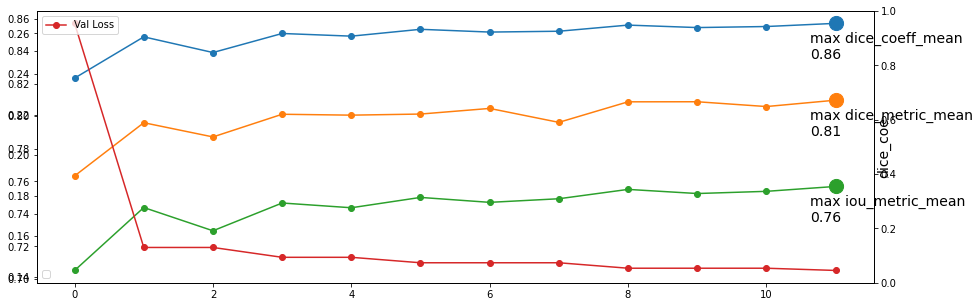

In [10]:
plot_results(metrics)

In [11]:
metrics = pd.read_json(PATH/'35_pytorch_unet_efficientnet_b6_1536_768_shifted_slices_groupkfold_aux_params_fold_1')
metrics

,fold,epoch,best_loss,dice_metric_mean,dice_coeff_mean,iou_metric_mean
0,1,0,0.433930,0.703549,0.764373,0.627990
1,1,1,0.120661,0.835118,0.885194,0.796966
2,1,2,0.109203,0.844763,0.892246,0.807403
3,1,3,0.109203,0.819946,0.853945,0.752740
4,1,4,0.092090,0.863050,0.908519,0.834692
5,1,5,0.092090,0.851347,0.902355,0.824828
6,1,6,0.086682,0.869188,0.913765,0.843602
7,1,7,0.086682,0.868464,0.912546,0.842531
8,1,8,0.086682,0.871074,0.910283,0.837833
9,1,9,0.084105,0.871040,0.916295,0.848391


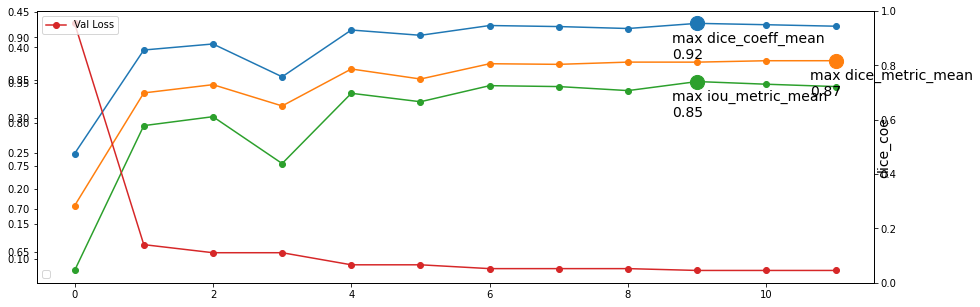

In [12]:
plot_results(metrics)

In [81]:
metrics = pd.read_json(PATH/'35_pytorch_unet_efficientnet_b6_1536_768_shifted_slices_groupkfold_aux_params_fold_2')
metrics

,fold,epoch,best_loss,dice_metric_mean,dice_coeff_mean,iou_metric_mean
0,2,0,0.415765,0.697995,0.773163,0.637979
1,2,1,0.142609,0.806285,0.862986,0.766242
2,2,2,0.112940,0.830332,0.888387,0.805395
3,2,3,0.112940,0.821905,0.877042,0.786931
4,2,4,0.112940,0.820228,0.881701,0.793503
5,2,5,0.112940,0.815274,0.868052,0.772161
6,2,6,0.112940,0.818446,0.874835,0.785337
7,2,7,0.112940,0.818460,0.878548,0.788839


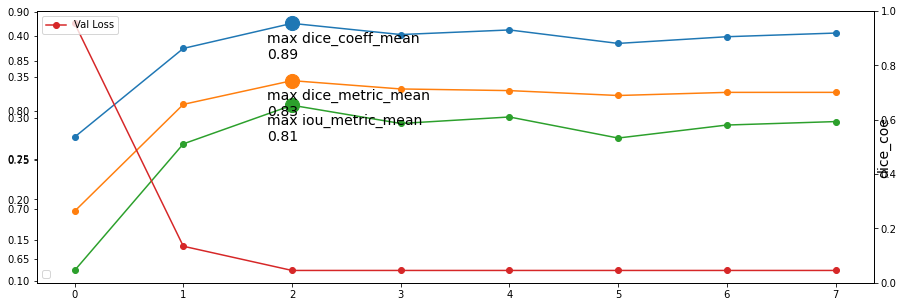

In [82]:
plot_results(metrics)

In [91]:
metrics = pd.read_json(PATH/'35_pytorch_unet_efficientnet_b6_1536_768_shifted_slices_groupkfold_aux_params_fold_3')
metrics

,fold,epoch,best_loss,dice_metric_mean,dice_coeff_mean,iou_metric_mean
0,3,0,0.319014,0.746817,0.802321,0.673987
1,3,1,0.165646,0.793990,0.840372,0.728386
2,3,2,0.144732,0.813521,0.856809,0.753197
3,3,3,0.135033,0.825390,0.865549,0.766197
4,3,4,0.135033,0.813508,0.862302,0.761820
5,3,5,0.135033,0.818545,0.859112,0.755997
6,3,6,0.135033,0.815699,0.864601,0.764681
7,3,7,0.135033,0.814206,0.858865,0.755915
8,3,8,0.135033,0.816248,0.863853,0.764387


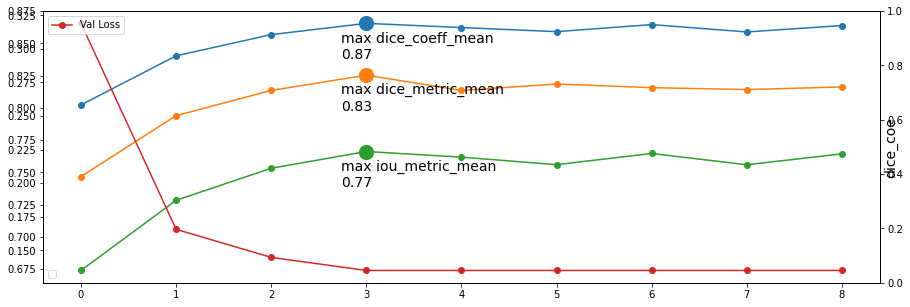

In [92]:
plot_results(metrics)

In [99]:
metrics = pd.read_json(PATH/'36_pytorch_fpn_efficientnet_b6_1536_768_shifted_slices_groupkfold_smooth_fold_0')
metrics

,fold,epoch,best_loss,dice_metric_mean,dice_coeff_mean,iou_metric_mean
0,0,0,0.150867,0.782195,0.836220,0.724236
1,0,1,0.140785,0.797737,0.855911,0.754286
2,0,2,0.131314,0.806064,0.860113,0.761269
3,0,3,0.131314,0.802428,0.856200,0.756605
4,0,4,0.131314,0.804092,0.856995,0.756811
5,0,5,0.131314,0.810225,0.861102,0.763161
6,0,6,0.131314,0.811973,0.859545,0.760570
7,0,7,0.131314,0.812687,0.861702,0.763902
8,0,8,0.131314,0.806874,0.860701,0.762959
9,0,9,0.131314,0.806172,0.858987,0.760667


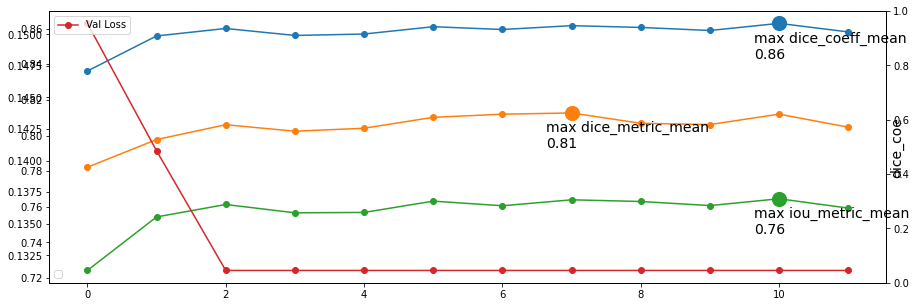

In [100]:
plot_results(metrics)

In [101]:
metrics = pd.read_json(PATH/'36_pytorch_fpn_efficientnet_b6_1536_768_shifted_slices_groupkfold_smooth_fold_1')
metrics

,fold,epoch,best_loss,dice_metric_mean,dice_coeff_mean,iou_metric_mean
0,1,0,0.147627,0.811744,0.873047,0.777428
1,1,1,0.116861,0.858104,0.911163,0.839396
2,1,2,0.116861,0.843938,0.886425,0.800164
3,1,3,0.116861,0.862865,0.911392,0.840531
4,1,4,0.116861,0.866587,0.915774,0.847843
5,1,5,0.107180,0.863346,0.917713,0.851975
6,1,6,0.107180,0.877766,0.923977,0.861454
7,1,7,0.107180,0.876783,0.922870,0.860324
8,1,8,0.107180,0.867548,0.920002,0.856162
9,1,9,0.107180,0.872189,0.920774,0.857031


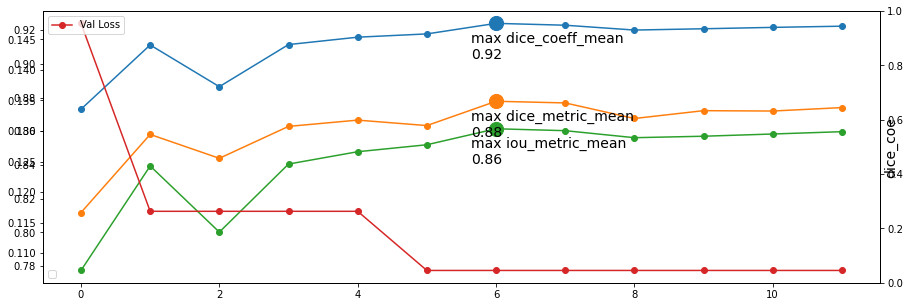

In [102]:
plot_results(metrics)

In [103]:
metrics = pd.read_json(PATH/'36_pytorch_fpn_efficientnet_b6_1536_768_shifted_slices_groupkfold_smooth_fold_2')
metrics

,fold,epoch,best_loss,dice_metric_mean,dice_coeff_mean,iou_metric_mean
0,2,0,0.187546,0.797640,0.868664,0.773697
1,2,1,0.135694,0.838650,0.898304,0.820668
2,2,2,0.135694,0.828290,0.893444,0.812764
3,2,3,0.129834,0.810609,0.879190,0.797028
4,2,4,0.127165,0.847775,0.906404,0.834747
5,2,5,0.122099,0.845493,0.905642,0.832979
6,2,6,0.122099,0.849622,0.907992,0.836861
7,2,7,0.122099,0.845892,0.906876,0.834954
8,2,8,0.122099,0.847438,0.908346,0.837681
9,2,9,0.122099,0.846771,0.906767,0.835264


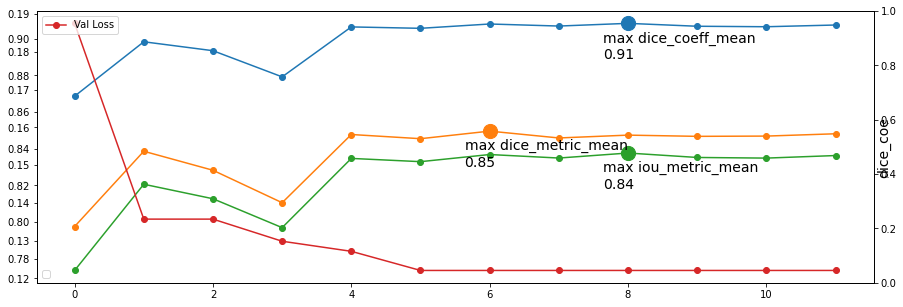

In [104]:
plot_results(metrics)

In [107]:
metrics = pd.read_json(PATH/'36_pytorch_fpn_efficientnet_b6_1536_768_shifted_slices_groupkfold_smooth_fold_3')
metrics

,fold,epoch,best_loss,dice_metric_mean,dice_coeff_mean,iou_metric_mean
0,3,0,0.151382,0.795701,0.851982,0.745967
1,3,1,0.151382,0.813567,0.867128,0.769292
2,3,2,0.135403,0.828499,0.871338,0.776060


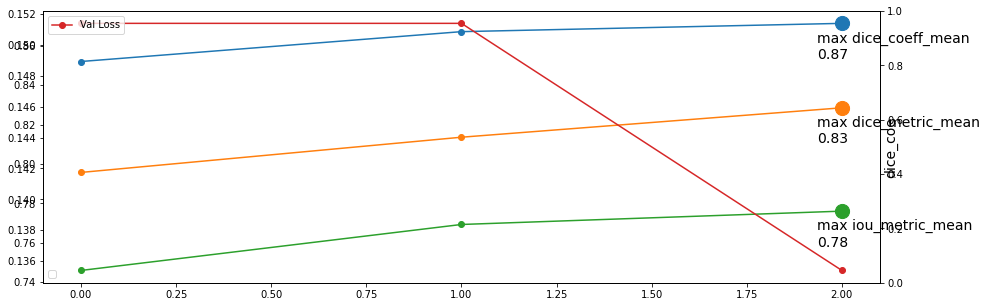

In [108]:
plot_results(metrics)